In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
header_list = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16","y"]
df = pd.read_csv("zoo_data.csv", names = header_list)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,y
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
features = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16"]
X = df[features]
y = df["y"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

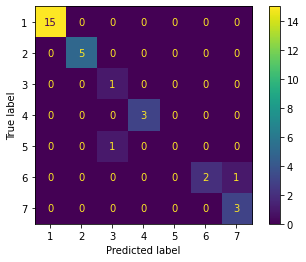

In [17]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [32]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred, average='micro')))
print("Recall: "+str(recall_score(y_test, y_pred, average='micro')))
print("F1: "+str(f1_score(y_test, y_pred, average='micro')))

Accuracy: 0.9354838709677419
Precision: 0.9354838709677419
Recall: 0.9354838709677419
F1: 0.9354838709677419


In [36]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

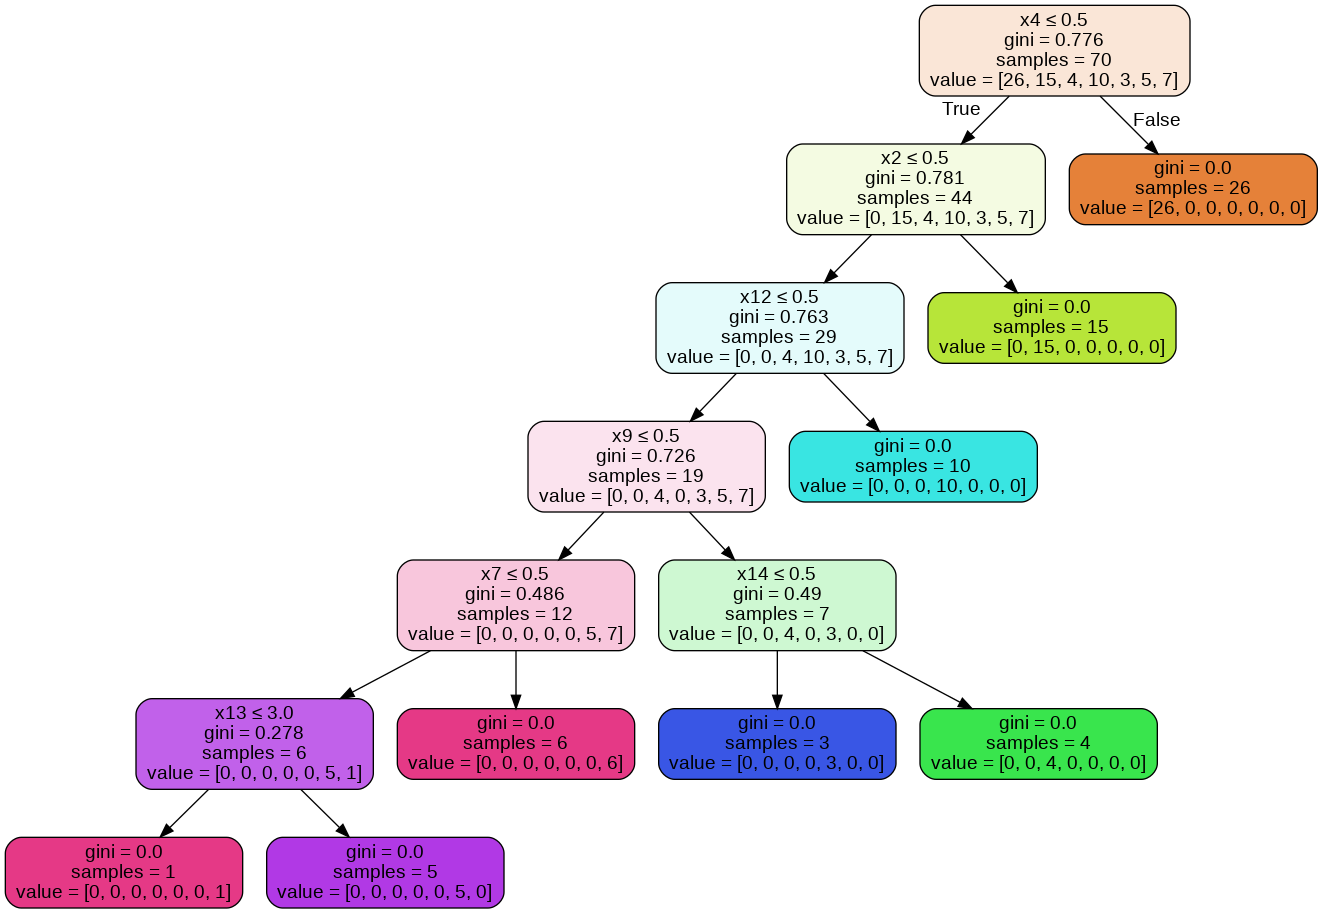

In [38]:
graph.write_png('zoo_data.png')
Image(graph.create_png())